In [2]:
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [3]:
cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# 이 데이터의 형태 (행, 열) 알아보기
cancer.data.shape

(569, 30)

In [6]:
# 데이터의 변수 이름들 출력
cancer.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# 데이터의 target 이름들 출력
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
# target의 실제값을 수치로 변환한 값 출력
# 0 : 양성, 1: 음성
real_target = []
for target in cancer.target:
    if target == 0:
        real_target.append('양성')
    else:
        real_target.append('음성')
len(real_target)

569

In [22]:
# 양성 / 음성 데이터가 각각 몇개인지 출력
# benign = real_target.count('양성')
# malignant = real_target.count('음성')
# print(f'양성 : {benign}, 음성 : {malignant}')
can = (cancer['target'] ==0).sum()
print(can)

cer = (cancer['target'] ==1).sum()
print(cer)



212
357


In [23]:
# 이 데이터를 훈련용, 테스트용, 시험지, 정답지로 나누기
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2,
                                                    random_state=1024,
                                                    stratify=cancer.target)
# 데이터 비율이 불균형한 샘플임
# stratify 옵션 넣어주기
# train, test 데이터에 있는 label 값의 비율이 서로 다르면
# 학습 결과, 모델 평가 등에서 잘못된 영향이 갈 확률이 큼
# dataset 쪽의 클래스의 비율과 같은 비율로 조정하는 옵션

In [24]:
# 의사 결정나무 모델 생성 (깊이 4, 불순도 옵션 = gini)
model = DecisionTreeClassifier(max_depth=4, criterion='gini')

In [27]:
# 모델에게 데이터 학습 (분리하기 전 데이터)
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier(max_depth=4)

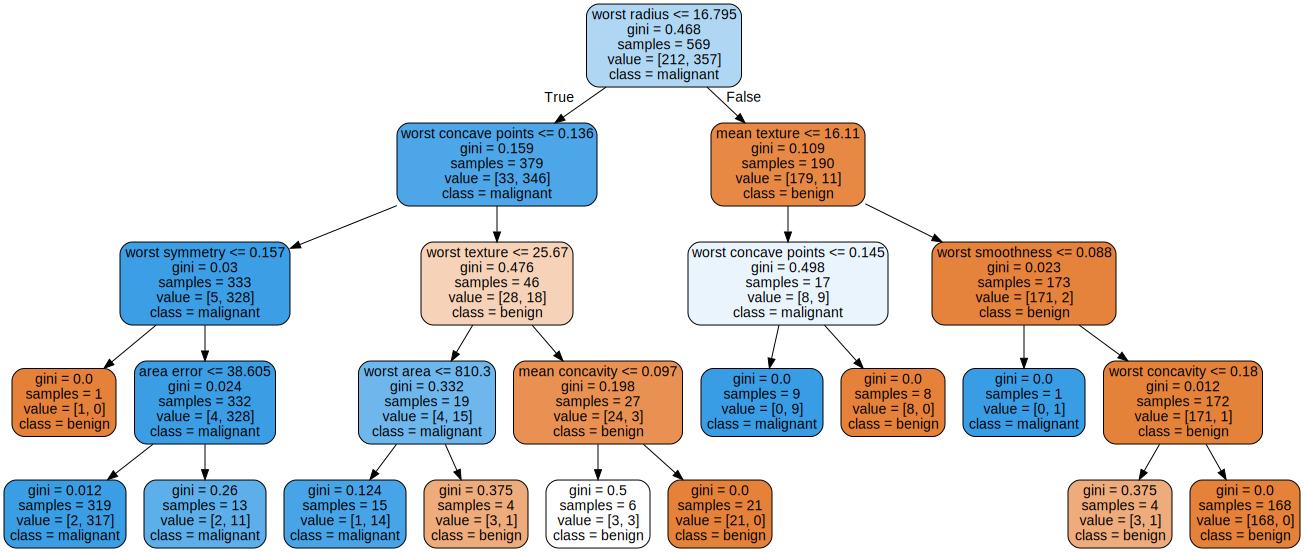

In [45]:
# dot => png로 나타내는 작업
# 열의 이름으로 분류하게 => 예측할 클래스의 이름을 '양성', '음성'으로 출력하도록 설정
import graphviz
from subprocess import check_call
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model,
                                out_file='./cancer.dot',
                                feature_names=cancer.feature_names,
                                class_names=['benign', 'malignant'],
                                rounded=True,
                                filled = True
                                )

check_call(['dot', '-Tpng', 'cancer.dot', '-o', 'cancer.png'])

with open('cancer.dot') as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src
